# Health Care Dataset - INM701 Coursework
Postgraduate students: 
- Tamila Skakova
- Elbaraa Elalami

## Content:
- **[Part 1](#part1)- Importing the data set, packages used**
- **[Part 2](#part2)- Exploratory data analysis**
- [Part 2.1](#part2.1)- Analysis of the features
- [Part 2.2](#part2.2)- Analysis of the Target
- [Part 2.3](#part2.3)- Statistical analysis of the dataset
- **[Part 3](#part3) -  Preparing our data**
- [Part 3.1](#part3.1) -  Missing Values
- [Part 3.2](#part3.2) -  Enconding, Shuffling, Scaling
- [Part 3.3](#part3.3) -  PCA
- [Part 3.4](#part3.4) -  SMOTE Analysis
- **[Part 4/1](#part4/1) -  Models**
- [Part 4.1.1](#part4.1.1) -  Score method
- [Part 4.1.2](#part4.1.2) -  KNN
- [Part 4.1.3](#part4.1.3) -  Decision tree model
- [Part 4.1.4](#part4.1.4) -  Random Forest
- [Part 4.1.5](#part4.1.5) -  Naive Bayes
- [Part 4.1.6](#part4.1.6) -  ANN
- **[Part 4/2](#part4/2) -  Models with SMOTE**
- [Part 4.2.1](#part4.2.1) -  KNN
- [Part 4.2.2](#part4.2.2) -  Decision tree model 
- [Part 4.2.3](#part4.2.3) -  Random Forest
- [Part 4.2.4](#part4.2.4) -  Naive Bayes
- [Part 4.2.5](#part4.2.5) -  ANN
- **[Part 5](#part5) -  Additional Models**
- [Part 5.1](#part5.1) -  Gradient Boost Classifier
- [Part 5.2](#part5.2) -  CatBoost Classifier
- [Part 5.2](#part5.2) -  XGB BOOST Classifier

## Description of features in the dataframe:

- `Column`	Description
- `case_id`	Case_ID registered in Hospital
- `Hospital_code`	Unique code for the Hospital
- `Hospital_type_code`	Unique code for the type of Hospital
- `City_Code_Hospital` City Code of the Hospital
- `Hospital_region_code`	Region Code of the Hospital
- `Available Extra Rooms in Hospital`	Number of Extra rooms available in the Hospital
- `Department`	Department overlooking the case
- `Ward_Type`	Code for the Ward type
- `Ward_Facility_Code`	Code for the Ward Facility
- `Bed Grade`	Condition of Bed in the Ward
- `patientid`	Unique Patient Id
- `City_Code_Patient`	City Code for the patient
- `Type of Admission`	Admission Type registered by the Hospital
- `Severity of Illness`	Severity of the illness recorded at the time of admission
- `Visitors with Patient`	Number of Visitors with the patient
- `Age`	Age of the patient
- `Admission_Deposit`	Deposit at the Admission Time
- `Stay`	Stay Days by the patient, the length of stay - 11 different classes ranging from 0-10 days to more than 100 days.


[Back to top](#Content:)


<a id='part1'></a>

## Part 1 -  Importing the data set, packages used

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
from scipy import stats
import prince
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import io
import time
import requests
%matplotlib inline

In [2]:
path = "healthcare"

filename_read = os.path.join(path, "train_data.csv")
health_care = pd.read_csv(filename_read, na_values=['NA', '?'])

# print(health_care.shape)
# print(health_care.columns)

In [3]:
health_care.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


[Back to top](#Content:)

<a id='part2'></a>
## Part 2- Exploratory data analysis (EDA)

[Back to top](#Content:)

<a id='part2.1'></a>
### Analysis of the features

In [4]:
#sorting by Stay for better representation in the visualisations
health_care = health_care.sort_values(by = "Stay", ascending = True)
# To make sure we consider all the correct features to make an accurate prediction, it may be useful to create some plots to have a better understanding of our data and relationship between them and the output feature. For that we have used Python data visualisation library seaborn. We begin by visualising the length of stays by age of patients admitted to hospitals, type of admissions, severity of illness, available extra rooms in hospitals,  etc., by using a countplot(), that shows the counts of observations in each categorical bin using bars.

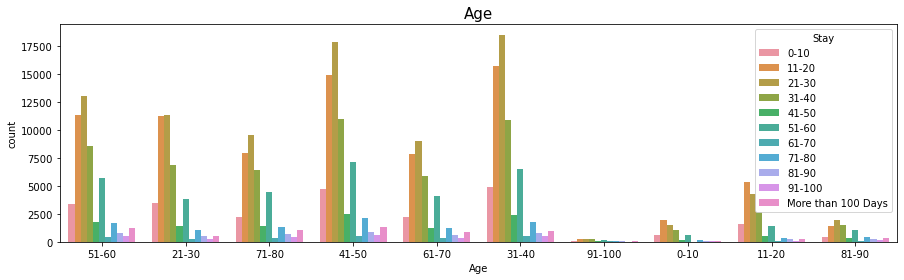

In [5]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Age", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Age", hue = 'Stay', data = health_care)

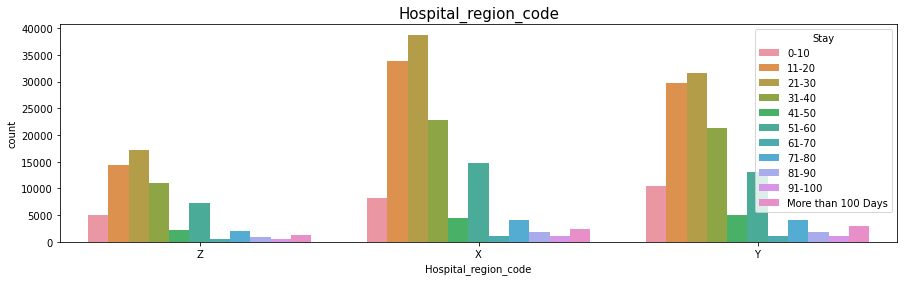

In [6]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Hospital_region_code", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Hospital_region_code", hue = 'Stay', data = health_care)

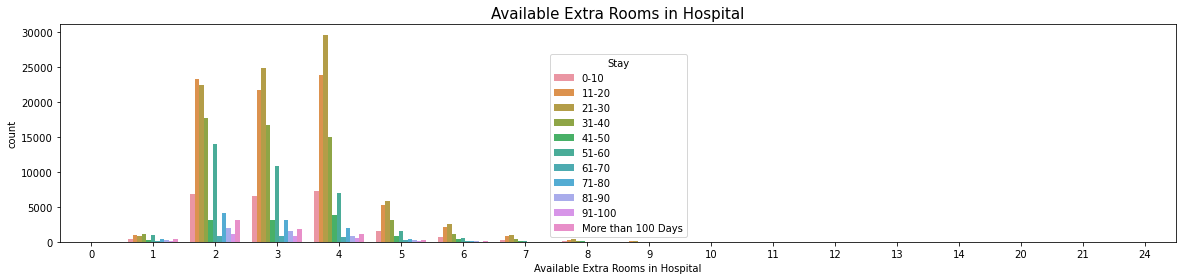

In [7]:
#plot size
plt.figure(figsize = (20,4))
#plot title
plt.title("Available Extra Rooms in Hospital", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Available Extra Rooms in Hospital", hue = 'Stay', data = health_care)

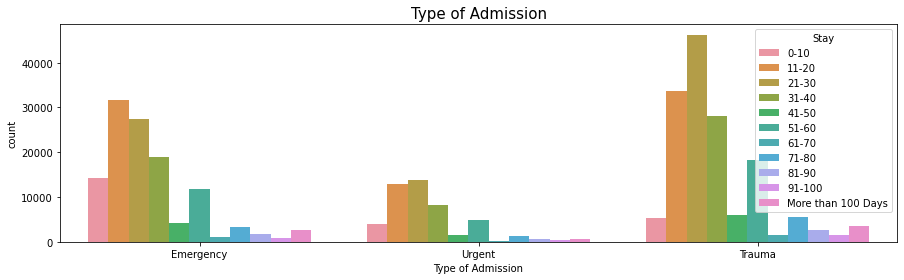

In [8]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Type of Admission", fontdict = {'fontsize': 15})
ax = sns.countplot(x = "Type of Admission", hue = 'Stay', data = health_care)


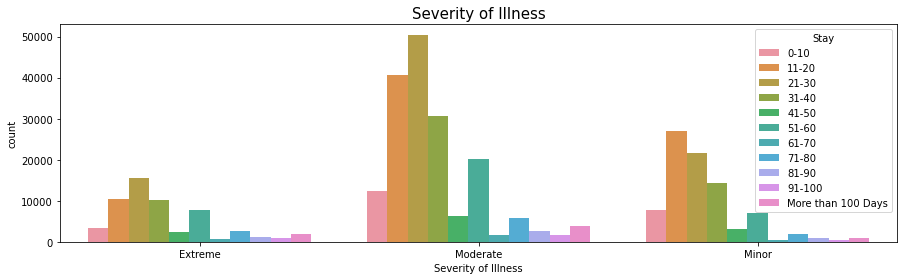

In [9]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Severity of Illness", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Severity of Illness", hue = 'Stay', data = health_care)

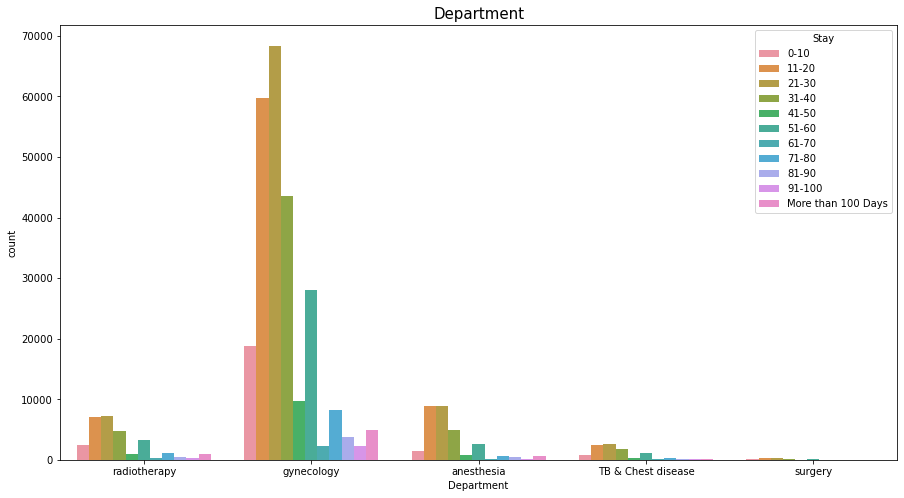

In [10]:
#plot size
plt.figure(figsize = (15,8))
#plot title
plt.title("Department", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Department", hue = 'Stay', data = health_care)

[Back to top](#Content:)

<a id='part2.2'></a>
### Analysis of the Target

In [11]:
## Checking target
#creating a copy of df to have an original for further manipulation
health_care_copy = health_care.copy()

In [12]:
#number of unique element for each feature
encoder = LabelEncoder()
health_care_copy['Stay_cat'] = encoder.fit_transform(health_care_copy['Stay'])
n = len(health_care_copy['Stay_cat'])
l = []
for i in range(len(np.unique(health_care_copy['Stay_cat']))):
    k = len(health_care[health_care_copy['Stay_cat']==i])
    #print(f'N {10*i} and {10*(i+1)} is : {k}')
    print(f'{i}- {k}  : {100*k/n:.2f}%')

0- 23604  : 7.41%
1- 78139  : 24.54%
2- 87491  : 27.48%
3- 55159  : 17.32%
4- 11743  : 3.69%
5- 35018  : 11.00%
6- 2744  : 0.86%
7- 10254  : 3.22%
8- 4838  : 1.52%
9- 2765  : 0.87%
10- 6683  : 2.10%


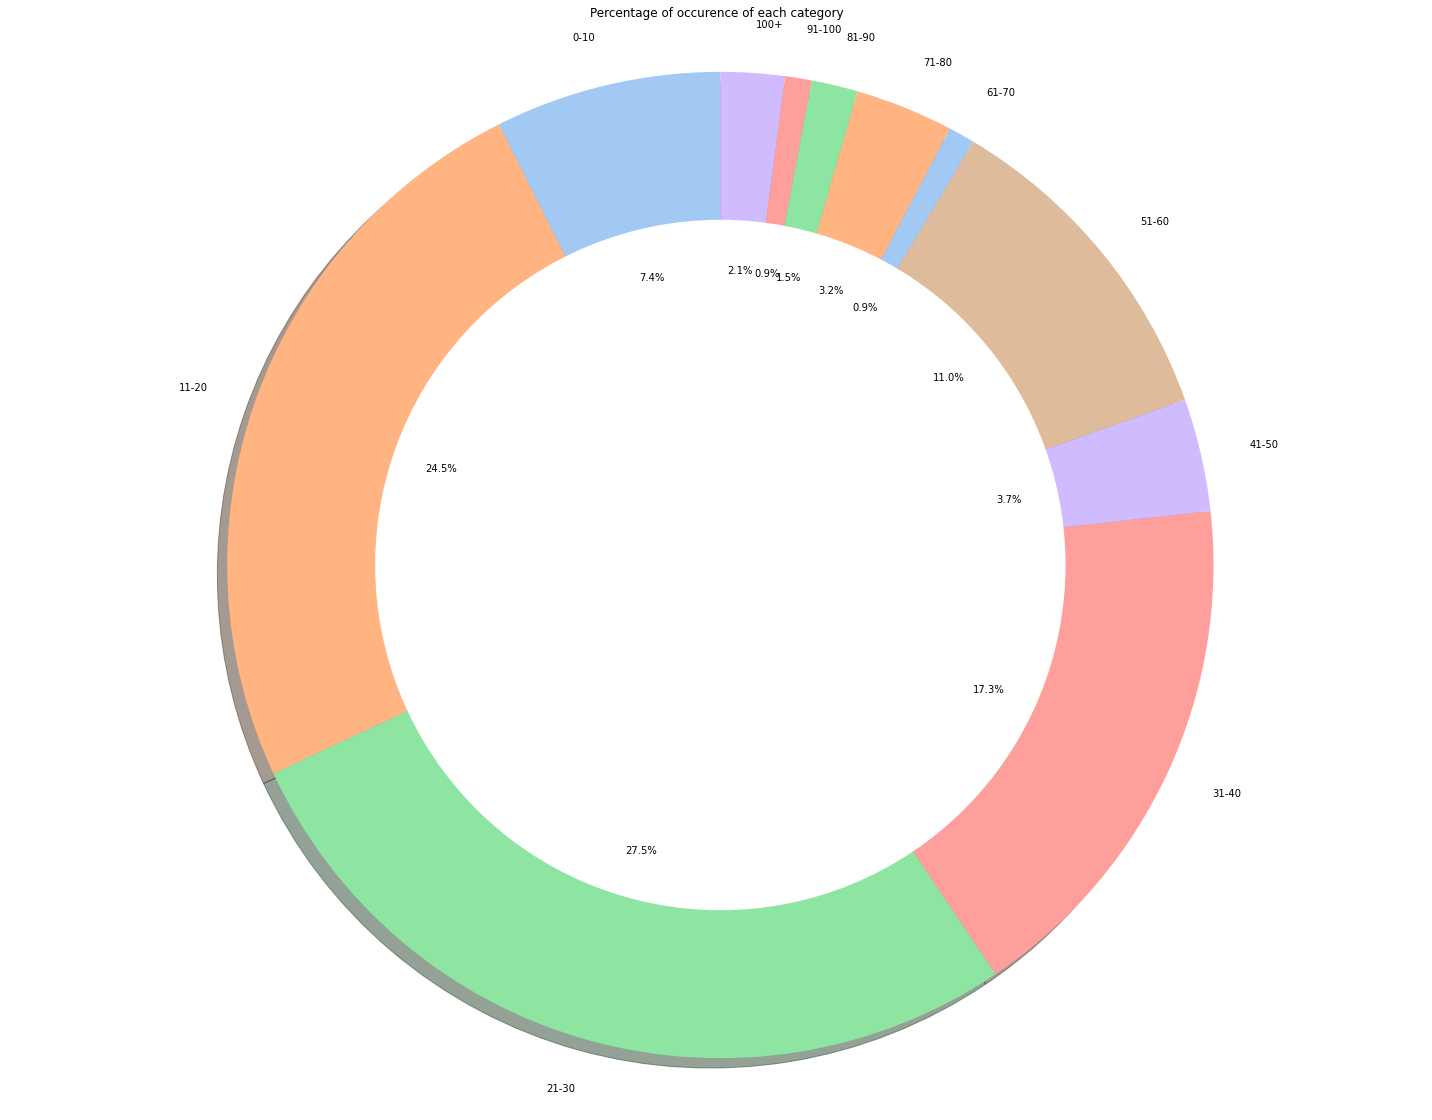

In [13]:
#Visualisation of Target categories
fig, ax1 = plt.subplots()
labels = np.unique(health_care['Stay'])
labels[-1] = '100+'

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(health_care.groupby('Stay').size(), labels = labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20, 15.5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of occurence of each category')
plt.show()

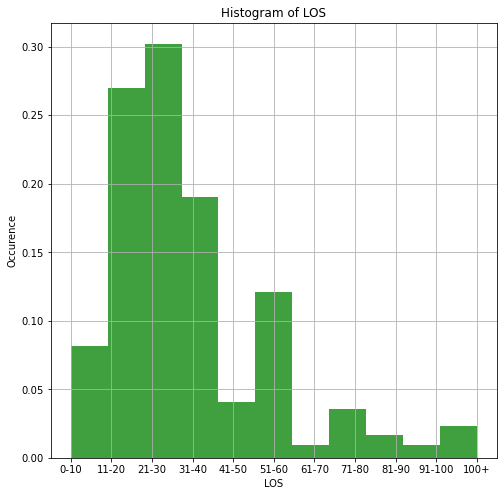

In [14]:
#Histogram plot
h = health_care['Stay'].sort_values()
h[h=='More than 100 Days'] = '100+'
plt.figure(figsize = (8,8))
plt.hist(h, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)

plt.xlabel('LOS')
plt.ylabel('Occurence')
plt.title('Histogram of LOS')

plt.grid(True)
plt.show()

[Back to top](#Content:)

<a id='part2.3'></a>
### Statistical analysis of the dataset

In [15]:
#statistical analysis of each feature
df_copy = health_care.copy()
new_df_copy = df_copy.drop(columns = ["case_id", "Hospital_code", "City_Code_Hospital", "Bed Grade", "patientid", "City_Code_Patient"])
new_df_copy = new_df_copy.select_dtypes(include=["int","float"])
headers = list(new_df_copy.columns.values)
fields = []
for field in headers:
    fields.append({
        "name":field,
        "mean":health_care[field].mean(),
        "var":health_care[field].var(),
        "sdev":health_care[field].std()
    })
for field in fields:
    print(field)

{'name': 'Available Extra Rooms in Hospital', 'mean': 3.1976271676119055, 'var': 1.3646244848651312, 'sdev': 1.1681714278585704}
{'name': 'Visitors with Patient', 'mean': 3.2840992595104854, 'var': 3.11191258613169, 'sdev': 1.764061389558677}
{'name': 'Admission_Deposit', 'mean': 4880.749392346391, 'var': 1181082.6254792996, 'sdev': 1086.776253641613}


In [16]:
## functions to feed to barplot
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def std(x):
    return np.std(x)

In [17]:
## Encoding data
df_copy2 = health_care.copy()
target = df_copy2['Stay']
target_enc = encoder.fit_transform(target)

In [18]:
## Estimate of length of stay
target_estimate = 10* (target_enc) + 5
# Adding the estimate to the dataframe
df_copy2['Stay Estimate'] = target_estimate

In [19]:
## Using only Features with limited classes for the plot
elements_to_remove = ['case_id', 'patientid', 'Admission_Deposit', 'Stay', 'Stay Estimate']
column_features = [ column for column in df_copy2.columns if column not in elements_to_remove]
print(column_features)

['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age']


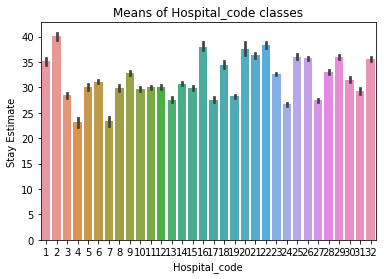

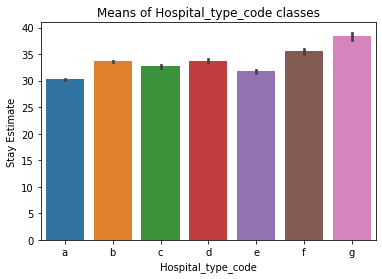

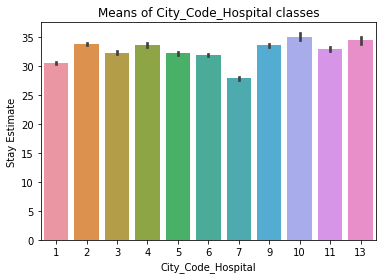

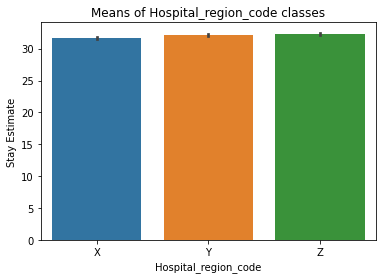

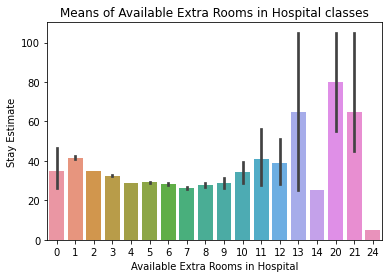

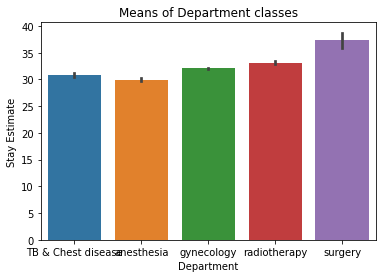

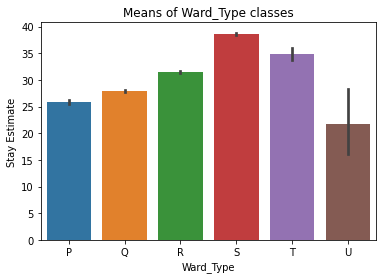

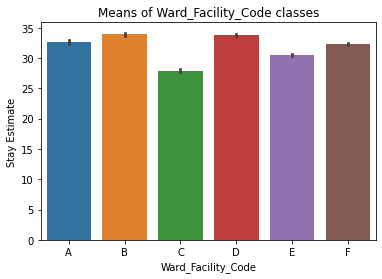

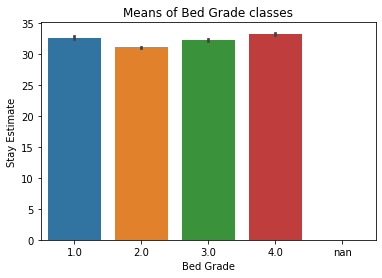

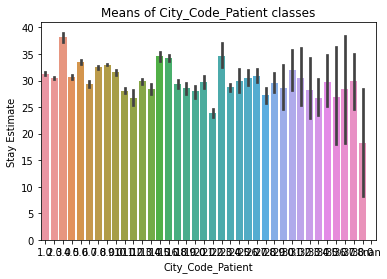

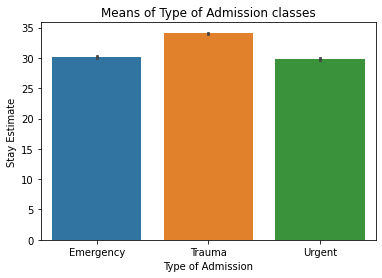

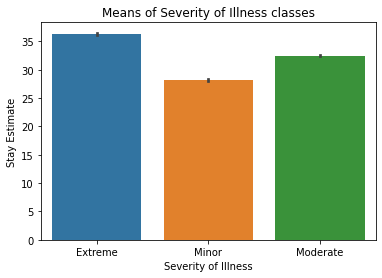

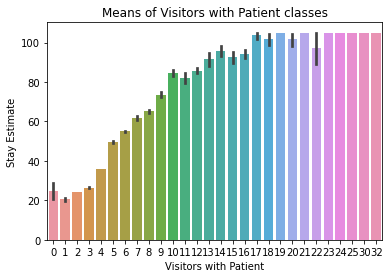

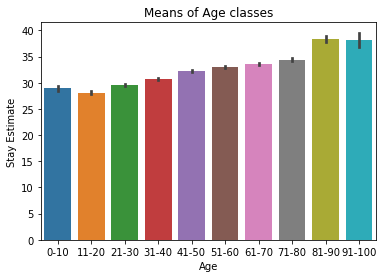

In [20]:
# Mean Analysis
#We study the relationship between the mean of stay and each feature
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=mean)
    ax.set_title(f'Means of {feature} classes') 
    plt.show();

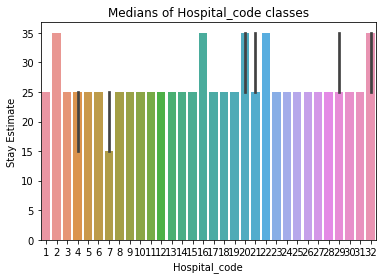

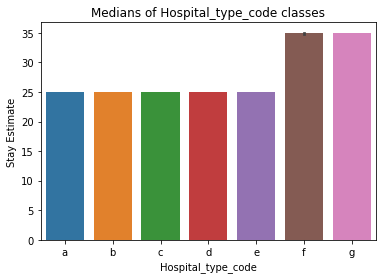

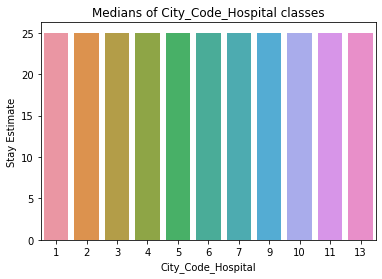

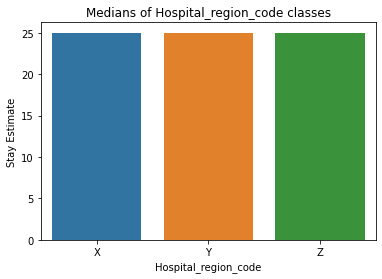

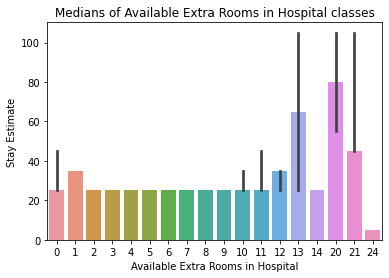

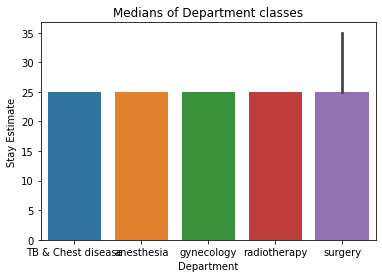

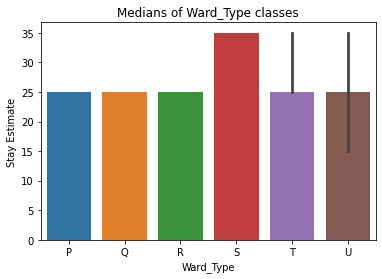

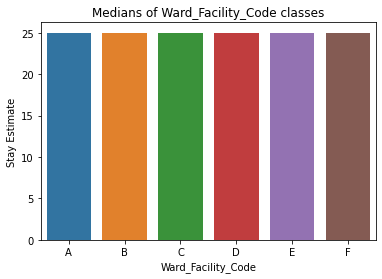

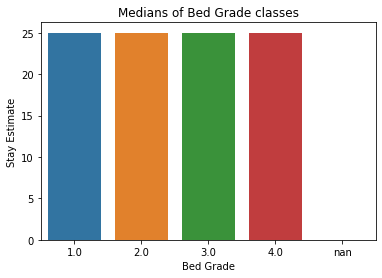

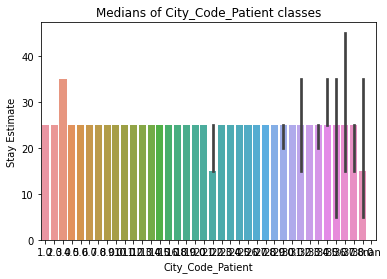

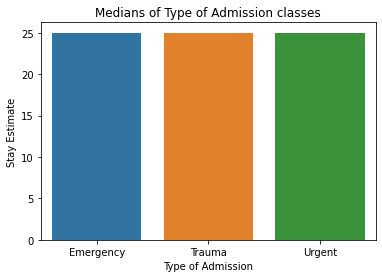

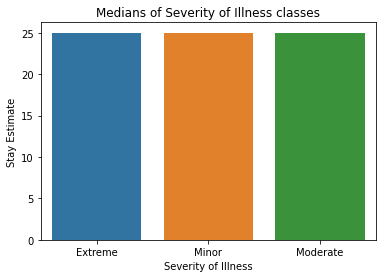

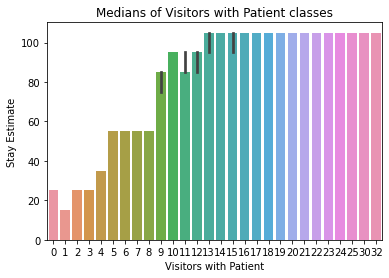

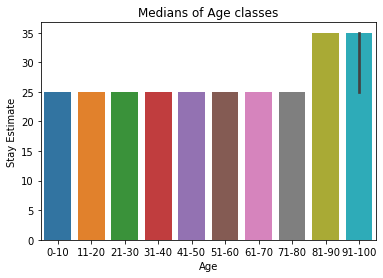

In [21]:
#Median Analysis
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=median)
    ax.set_title(f'Medians of {feature} classes') 
    plt.show();

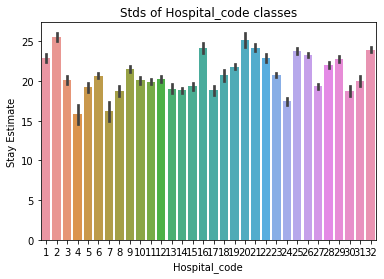

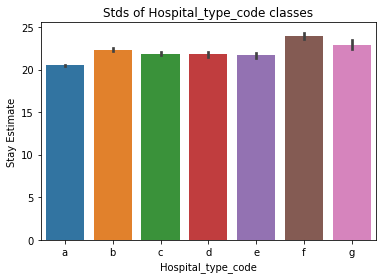

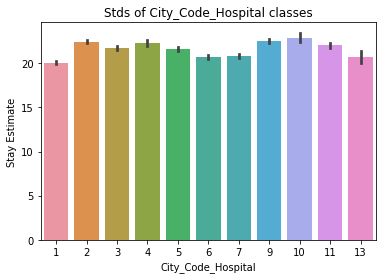

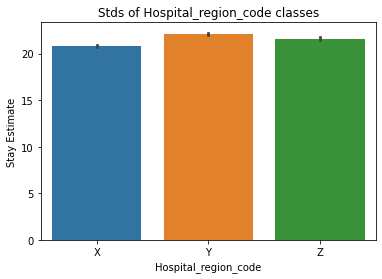

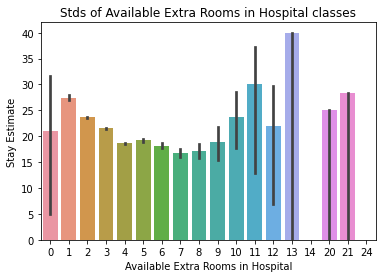

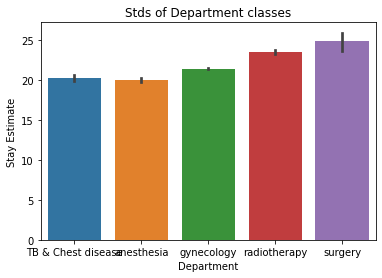

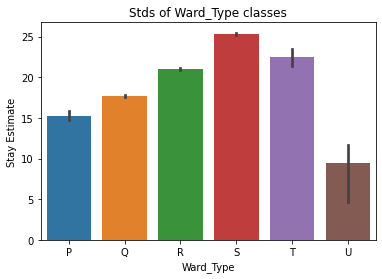

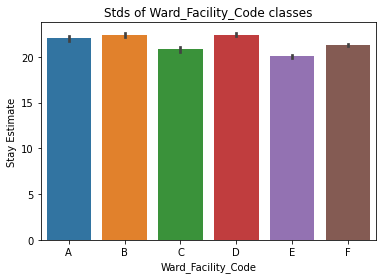

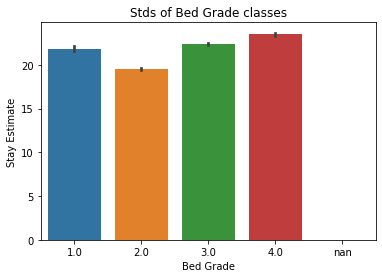

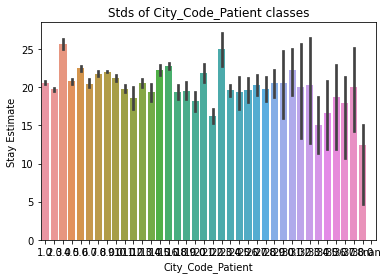

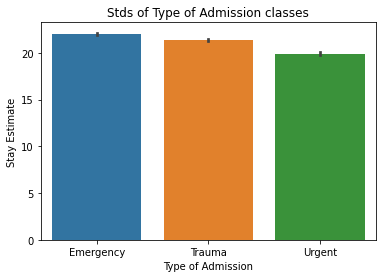

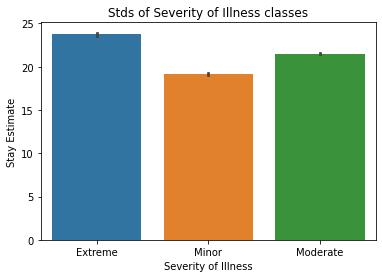

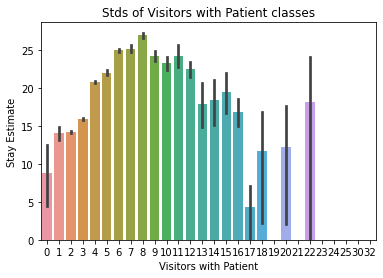

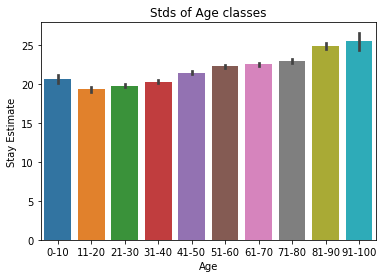

In [22]:
#Analysis of Std
for feature in column_features :
    order = pd.unique(df_copy2[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=df_copy2,order=order, estimator=std)
    ax.set_title(f'Stds of {feature} classes') 
    plt.show();

[Back to top](#Content:)

<a id='part3'></a>
## Part 3 - Preparing our data

[Back to top](#Content:)

<a id='part3.1'></a>
### Missing Values

In [23]:
#checking for missing values
health_care.isnull().values.any()

True

In [24]:
#Checking number of NANs for each column, in order to understand how many missing values there are in a dataframe.
print("# of NaN in each columns:", health_care.isnull().sum(), sep='\n')

# of NaN in each columns:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [25]:
#calculates percentage of missing values in the specific feature
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

In [26]:
print('Missing value ratios:\nBed Grade: {}\nCity_Code_Patient: {}'.format(
    perc_mv(health_care, health_care['Bed Grade']),
    perc_mv(health_care, health_care['City_Code_Patient'])))

Missing value ratios:
Bed Grade: 0.035485714644609
City_Code_Patient: 1.4231969802598936


In [27]:
#In the code cell below, we use the attribute dtype on df to retrieve the data type for each column.
print (health_care.dtypes)

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object


In [28]:
#We want to map the name of each Severity of Illness to the corresponding number in ascending order.
health_care['Severity of Illness'] = health_care['Severity of Illness'].map({'Minor':1, 'Moderate': 2, 'Extreme':3})
health_care['Type of Admission'] = health_care['Type of Admission'].map({'Trauma':1, 'Emergency': 2, 'Urgent':3})
# health_care

In [29]:
#dropping features
elements_to_remove = ['case_id', 'City_Code_Hospital', 'City_Code_Patient', 'patientid', 'Bed Grade', 'Admission_Deposit']
health_care = health_care.drop(elements_to_remove, axis=1)

[Back to top](#Content:)

<a id='part3.2'></a>
### Enconding, Shuffling, Scaling

In [30]:
#using LabelEncoder to change and transform the object format of 
le = LabelEncoder()
for col in ['Hospital_type_code', 'Hospital_region_code','Ward_Type', 'Ward_Facility_Code', 'Department', 'Age', 'Stay']:
    health_care[col]= health_care[col].astype('str')
    health_care[col]= le.fit_transform(health_care[col])
print (health_care.dtypes)

Hospital_code                        int64
Hospital_type_code                   int32
Hospital_region_code                 int32
Available Extra Rooms in Hospital    int64
Department                           int32
Ward_Type                            int32
Ward_Facility_Code                   int32
Type of Admission                    int64
Severity of Illness                  int64
Visitors with Patient                int64
Age                                  int32
Stay                                 int32
dtype: object


In [31]:
# # Function to hot encode (forthe column with name : name for dataframe df
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [32]:
# # Columns where we use Label Encoding
# le_string_columns = ['Severity of Illness', 'Age' ]
# # Columns where we use One Hot Encoding
# dummies_string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
# encoder = LabelEncoder()

# ## label_encoded data
# Xe = health_care.drop(['Stay', 'patientid'], axis=1)
# Xe['Severity of Illness']= Xe['Severity of Illness'].map({'Minor': 0,  'Moderate': 1,'Extreme': 2})
# Xe['Age'] = encoder.fit_transform(Xe['Age'])

# ye = health_care['Stay']
# ye = encoder.fit_transform(ye)

# for column in dummies_string_columns :
#     encode_text_dummy(Xe, column)

In [33]:
# #Scaling Hot Encoded Data
# scaler = StandardScaler()
# X = Xe.values
# y = ye
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# for i in range(X_train.shape[1]) :
#     X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
#     X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

In [34]:
#shuffling
health_care= health_care.reindex(np.random.permutation(health_care.index))
health_care.reset_index(inplace=True, drop=True)

In [35]:
#initialisation
X = health_care.drop(columns = ["Stay"])
y = health_care["Stay"]

[Back to top](#Content:)

<a id='part3.3'></a>
### PCA

In [36]:
#Principal component analysis
#Choosing the number of components
scaler=StandardScaler()
X_scaler = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaler)

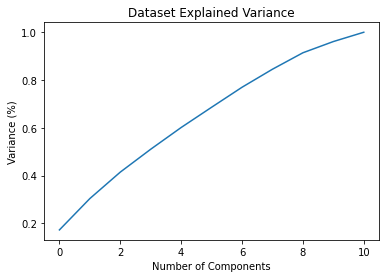

In [37]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17298781, 0.30416866, 0.4148431 , 0.51060786, 0.60149156,
       0.68618983, 0.76989892, 0.84533686, 0.91412017, 0.96105488,
       1.        ])

In [39]:
# For our analysis we choose n_components = 7
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaler)
X_pca_with_constant = sm.add_constant(X_pca)

[Back to top](#Content:)

<a id='part3.4'></a>
### SMOTE analysis
Here we will study imbalance data

<AxesSubplot:>

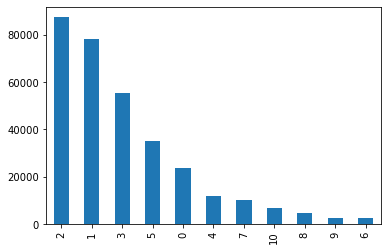

In [40]:
health_care["Stay"].value_counts().plot.bar()

In [41]:
smote_health_care = health_care.copy()

# X = np.array(smote_health_care.loc[:, smote_health_care.columns != "Stay"])
y = np.array(smote_health_care.loc[:, smote_health_care.columns == "Stay"]).reshape(-1, 1)

X = scaler.fit_transform(X_pca_with_constant)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

<AxesSubplot:>

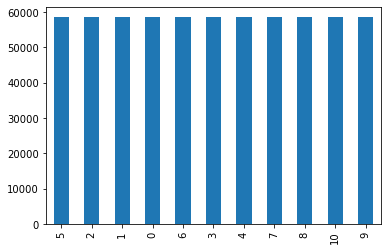

In [43]:
# observe that data has been balanced
pd.Series(y_train_SMOTE).value_counts().plot.bar()

[Back to top](#Content:)


<a id='part4/1'></a>

## Part - 4 Models 

[Back to top](#Content:)

<a id='part4.1.1'></a>
### Score method

In [99]:
# Score of 1 is perfect. The closer the score to 1 the better
K = 10 # Num of Classes - 1 here

# Classes can be ranked here from 0-10
def score(pred, target):
    error = (np.mean(np.abs(pred-target)))/K
    score = 1 - error
    return score

[Back to top](#Content:)

<a id='part4.1.2'></a>
### KNN

In [45]:
# Splitting dataset
y = health_care["Stay"]
X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [46]:
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [47]:
y_pred = knn.predict(X_test)

In [48]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy: 0.35
Score : 0.87


In [49]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3464243231669601
Recall: 0.3464243231669601


In [50]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.13      0.15      7789
           1       0.34      0.45      0.39     25786
           2       0.38      0.50      0.43     28872
           3       0.31      0.22      0.26     18203
           4       0.08      0.00      0.01      3875
           5       0.37      0.37      0.37     11556
           6       0.05      0.00      0.00       906
           7       0.18      0.04      0.07      3384
           8       0.26      0.10      0.15      1597
           9       0.27      0.02      0.04       912
          10       0.50      0.32      0.39      2205

    accuracy                           0.35    105085
   macro avg       0.27      0.20      0.20    105085
weighted avg       0.32      0.35      0.32    105085



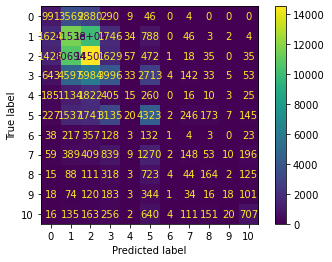

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.1.3'></a>
### Decision Trees

In [59]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
y_pred = tree.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.326
Score : 0.86


In [64]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.32551743826426227
Recall: 0.32551743826426227


In [65]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.16      0.16      7789
           1       0.34      0.41      0.37     25786
           2       0.38      0.47      0.42     28872
           3       0.28      0.21      0.24     18203
           4       0.06      0.02      0.03      3875
           5       0.35      0.31      0.33     11556
           6       0.02      0.01      0.01       906
           7       0.17      0.10      0.13      3384
           8       0.21      0.16      0.18      1597
           9       0.14      0.08      0.10       912
          10       0.41      0.33      0.36      2205

    accuracy                           0.33    105085
   macro avg       0.23      0.20      0.21    105085
weighted avg       0.31      0.33      0.31    105085



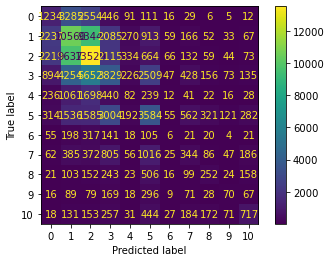

In [66]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

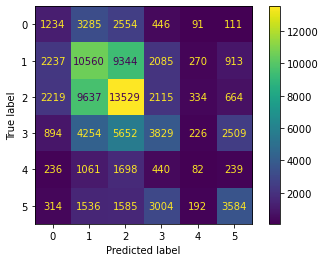

In [67]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)

<a id='part4.1.4'></a>
### Random Forest

In [68]:
forest = RandomForestClassifier(n_estimators=60, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60)

In [69]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.343
Score : 0.8711


In [70]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3432935242898606
Recall: 0.3432935242898606


In [71]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.10      0.13      7789
           1       0.35      0.39      0.37     25786
           2       0.39      0.53      0.45     28872
           3       0.29      0.22      0.25     18203
           4       0.06      0.02      0.03      3875
           5       0.35      0.39      0.37     11556
           6       0.03      0.01      0.01       906
           7       0.18      0.09      0.12      3384
           8       0.26      0.15      0.19      1597
           9       0.17      0.06      0.09       912
          10       0.43      0.40      0.42      2205

    accuracy                           0.34    105085
   macro avg       0.25      0.21      0.22    105085
weighted avg       0.32      0.34      0.32    105085



In [72]:
#to evaluate the importance of features 
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.147 seconds


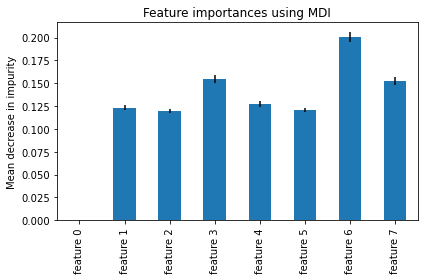

In [73]:
#The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars.
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

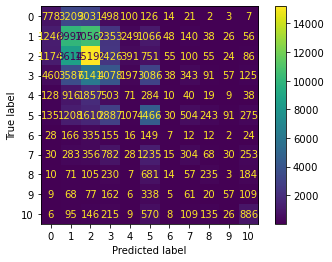

In [74]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

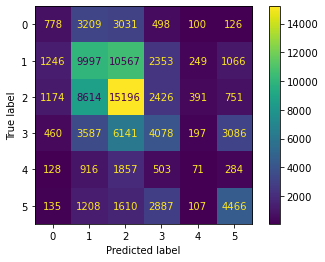

In [75]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

In [76]:
### Cross Validating to check some results
kf = KFold(10, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest.ravel(), y_pred.ravel()))

Accuracy : 0.3488
Score : 0.8738
Accuracy : 0.3456
Score : 0.8724
Accuracy : 0.3509
Score : 0.8745
Accuracy : 0.3484
Score : 0.8733
Accuracy : 0.3509
Score : 0.8729
Accuracy : 0.3512
Score : 0.8741
Accuracy : 0.3520
Score : 0.8746
Accuracy : 0.3495
Score : 0.8734
Accuracy : 0.3547
Score : 0.8752
Accuracy : 0.3498
Score : 0.8734


In [77]:
accuracy_data = []
score_data = []

for i in range(20,70,4):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-(np.mean(np.abs(y_test-y_pred)))/K
    print(f'n_estimators : {i}')
    print(f'Accuracy : %.4f' % accuracy)
    print(f'Score  : %.4f' % score)
    print('--------------')
    accuracy_data.append(accuracy)
    score_data.append(score)

n_estimators : 20
Accuracy : 0.3388
Score  : 0.8699
--------------
n_estimators : 24
Accuracy : 0.3406
Score  : 0.8701
--------------
n_estimators : 28
Accuracy : 0.3400
Score  : 0.8703
--------------
n_estimators : 32
Accuracy : 0.3405
Score  : 0.8706
--------------
n_estimators : 36
Accuracy : 0.3416
Score  : 0.8708
--------------
n_estimators : 40
Accuracy : 0.3408
Score  : 0.8708
--------------
n_estimators : 44
Accuracy : 0.3418
Score  : 0.8709
--------------
n_estimators : 48
Accuracy : 0.3424
Score  : 0.8714
--------------
n_estimators : 52
Accuracy : 0.3434
Score  : 0.8714
--------------
n_estimators : 56
Accuracy : 0.3427
Score  : 0.8716
--------------
n_estimators : 60
Accuracy : 0.3435
Score  : 0.8717
--------------
n_estimators : 64
Accuracy : 0.3436
Score  : 0.8717
--------------
n_estimators : 68
Accuracy : 0.3438
Score  : 0.8715
--------------


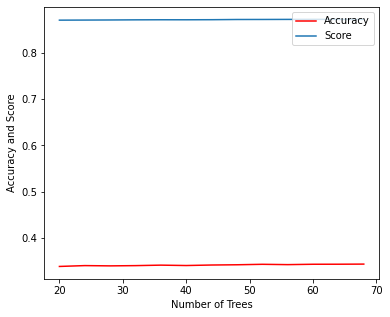

In [78]:
#Plotting accuracy and score with increasing n_estimators
nums = []
for i in range(20,70,4):
    nums.append(i)

fig = plt.figure(figsize=(6,5))
plt.plot(nums, accuracy_data, c='r', label='Accuracy')
plt.plot(nums, score_data, label='Score')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy and Score')
plt.legend(loc='upper right')
plt.show()

In [79]:
#Last Model results
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

Accuracy : 0.344
Score : 0.8715


In [80]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.34382642622638815
Recall: 0.34382642622638815


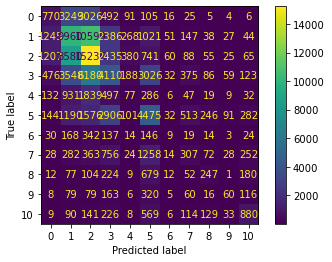

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

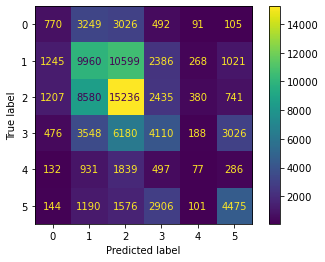

In [82]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part4.1.5'></a>
### Naive Bayes

In [83]:
smoothing = [1e-3, 1e-2, 1e-1, 1, 10]

for var_smoothing in smoothing :
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Smoothing parameter : {var_smoothing}')
    print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Score : %.4f' % score)
    print('----------------------')
    

Smoothing parameter : 0.001
Accuracy : 0.332
Score : 0.8685
----------------------
Smoothing parameter : 0.01
Accuracy : 0.332
Score : 0.8686
----------------------
Smoothing parameter : 0.1
Accuracy : 0.328
Score : 0.8674
----------------------
Smoothing parameter : 1
Accuracy : 0.291
Score : 0.8551
----------------------
Smoothing parameter : 10
Accuracy : 0.275
Score : 0.8514
----------------------


In [84]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score)
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.291
Score : 0.8514
Precision: 0.2913546176904411
Recall: 0.2913546176904411


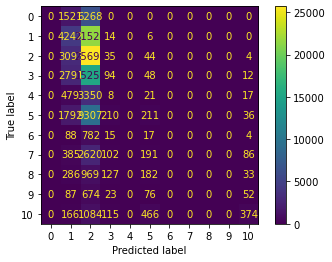

In [87]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

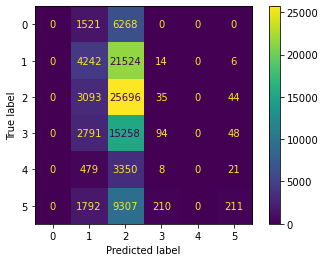

In [88]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)

<a id='part4.1.6'></a>
### ANN

In [89]:
nn = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
nn.add(Dense(32, input_dim=X.shape[1], activation='relu'))
nn.add(Dense(84, activation='relu'))
nn.add(Dense(11, activation='softmax'))

In [90]:
nn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
nn.fit(X_train,y_train,verbose=1,epochs=50)
pred = nn.predict(X_test)
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
print(f'Score : %.4f' % score)

Epoch 1/50
6668/6668 [==============================] - 15s 2ms/step - loss: 11.4227
Epoch 2/50
6668/6668 [==============================] - 13s 2ms/step - loss: 11.4227
Epoch 3/50
6668/6668 [==============================] - 13s 2ms/step - loss: 11.4227
Epoch 4/50
6668/6668 [==============================] - 13s 2ms/step - loss: 11.4227
Epoch 5/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 6/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 7/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 8/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 9/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 10/50
6668/6668 [==============================] - 12s 2ms/step - loss: 11.4227
Epoch 11/50
6668/6668 [==============================] - 11s 2ms/step - loss: 11.4227
Epoch 12/50
6668/6668 [==============================] - 12s 2m

In [92]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.2913546176904411
Recall: 0.2913546176904411


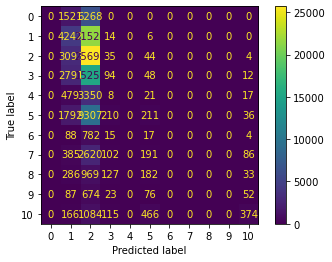

In [94]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4/2'></a>
### Application of models with SMOTE
Here we are applying SMOTE for imbalanced data.


We are reintroducing smote again and splitting our balanced data, so that our program does not pick X_test from the original data.

In [95]:
smote_health_care = health_care.copy()
# X = np.array(smote_health_care.loc[:, smote_health_care.columns != "Stay"])
y = np.array(smote_health_care.loc[:, smote_health_care.columns == "Stay"]).reshape(-1, 1)

X = scaler.fit_transform(X_pca_with_constant)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

[Back to top](#Content:)

<a id='part4.2.1'></a>
### KNN with SMOTE

In [96]:
#with Smote
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train_SMOTE, y_train_SMOTE) 

KNeighborsClassifier(n_neighbors=10)

In [97]:
y_pred = knn.predict(X_test)

In [100]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))
#score
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy: 0.25
Score : 0.82


In [101]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.25309035542655944
Recall: 0.25309035542655944


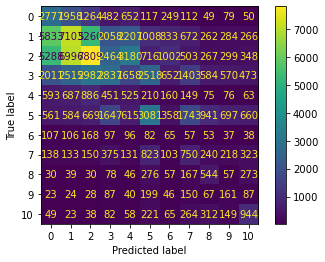

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.2'></a>
### Decision Tree with SMOTE

In [103]:
#with SMOTE
tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy')

In [104]:
y_pred = tree.predict(X_test)

In [105]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.287
Score : 0.8437
Precision: 0.2874054336965314
Recall: 0.2874054336965314


In [106]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.27      0.21      7789
           1       0.34      0.34      0.34     25786
           2       0.39      0.36      0.37     28872
           3       0.27      0.20      0.23     18203
           4       0.07      0.10      0.08      3875
           5       0.34      0.29      0.31     11556
           6       0.02      0.03      0.02       906
           7       0.14      0.15      0.15      3384
           8       0.17      0.23      0.19      1597
           9       0.06      0.10      0.07       912
          10       0.32      0.37      0.34      2205

    accuracy                           0.29    105085
   macro avg       0.21      0.22      0.21    105085
weighted avg       0.30      0.29      0.29    105085



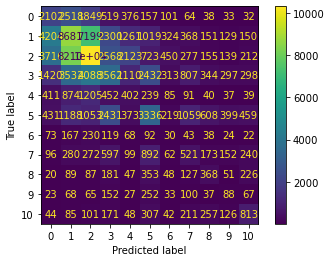

In [107]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.3'></a>
### Random Forest with SMOTE

In [108]:
forest = RandomForestClassifier(n_estimators=60, criterion='entropy')
forest.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=60)

In [109]:
y_pred = forest.predict(X_test)

In [110]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.293
Score : 0.8474
Precision: 0.2933720321644383
Recall: 0.2933720321644383


In [111]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.25      0.21      7789
           1       0.35      0.31      0.33     25786
           2       0.39      0.38      0.38     28872
           3       0.27      0.20      0.23     18203
           4       0.07      0.12      0.09      3875
           5       0.34      0.32      0.33     11556
           6       0.02      0.04      0.03       906
           7       0.14      0.17      0.16      3384
           8       0.20      0.30      0.24      1597
           9       0.09      0.13      0.10       912
          10       0.33      0.44      0.38      2205

    accuracy                           0.29    105085
   macro avg       0.22      0.24      0.23    105085
weighted avg       0.31      0.29      0.30    105085



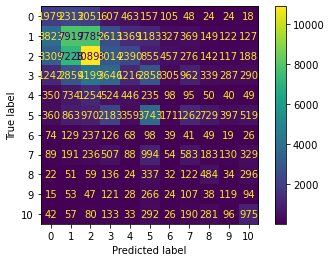

In [112]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.4'></a>
### Naive Bayes with SMOTE

In [113]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(X_test)

In [114]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.194
Score : 0.7947
Precision: 0.1942237236522815
Recall: 0.1942237236522815


In [115]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.60      0.22      7789
           1       0.36      0.14      0.20     25786
           2       0.42      0.24      0.31     28872
           3       0.25      0.02      0.03     18203
           4       0.06      0.11      0.07      3875
           5       0.30      0.23      0.26     11556
           6       0.01      0.20      0.02       906
           7       0.11      0.01      0.01      3384
           8       0.12      0.62      0.20      1597
           9       0.04      0.03      0.04       912
          10       0.50      0.29      0.36      2205

    accuracy                           0.19    105085
   macro avg       0.21      0.23      0.16    105085
weighted avg       0.31      0.19      0.20    105085



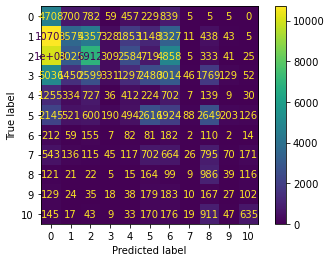

In [116]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)

<a id='part4.2.5'></a>
### ANN with SMOTE

In [117]:
nn = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
nn.add(Dense(12, input_dim=X.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.add(Dropout(0.2))
nn.add(Dense(1))

In [118]:
nn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')

In [119]:
nn.fit(X_train_SMOTE,y_train_SMOTE,verbose=1,epochs=20)
pred = nn.predict(X_test)

Epoch 1/20
20151/20151 [==============================] - 39s 2ms/step - loss: 8.6075
Epoch 2/20
20151/20151 [==============================] - 36s 2ms/step - loss: 6.9372
Epoch 3/20
20151/20151 [==============================] - 37s 2ms/step - loss: 6.9149: 0s - loss
Epoch 4/20
20151/20151 [==============================] - 38s 2ms/step - loss: 6.8948
Epoch 5/20
20151/20151 [==============================] - 34s 2ms/step - loss: 6.8590
Epoch 6/20
20151/20151 [==============================] - 33s 2ms/step - loss: 6.8475
Epoch 7/20
20151/20151 [==============================] - 34s 2ms/step - loss: 6.8414
Epoch 8/20
20151/20151 [==============================] - 33s 2ms/step - loss: 6.8516
Epoch 9/20
20151/20151 [==============================] - 36s 2ms/step - loss: 6.8281
Epoch 10/20
20151/20151 [==============================] - 36s 2ms/step - loss: 6.8526: 0s - loss - ETA: 0s - loss: 6.8
Epoch 11/20
20151/20151 [==============================] - 37s 2ms/step - loss: 6.8376
Epoch 12

In [120]:
#Accuracy score
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.194
Score : 0.7947
Precision: 0.1942237236522815
Recall: 0.1942237236522815


In [121]:
# calling classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.60      0.22      7789
           1       0.36      0.14      0.20     25786
           2       0.42      0.24      0.31     28872
           3       0.25      0.02      0.03     18203
           4       0.06      0.11      0.07      3875
           5       0.30      0.23      0.26     11556
           6       0.01      0.20      0.02       906
           7       0.11      0.01      0.01      3384
           8       0.12      0.62      0.20      1597
           9       0.04      0.03      0.04       912
          10       0.50      0.29      0.36      2205

    accuracy                           0.19    105085
   macro avg       0.21      0.23      0.16    105085
weighted avg       0.31      0.19      0.20    105085



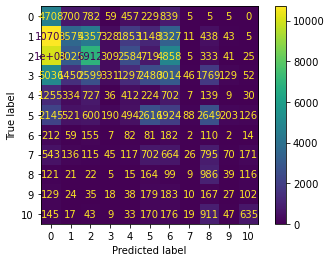

In [126]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

[Back to top](#Content:)


<a id='part5'></a>

## Part - 5 Additional Models

[Back to top](#Content:)


<a id='part5.1'></a>
### Gradient Boost Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [134]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Accuracy : 0.365
Score : 0.8790


In [135]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

Precision: 0.3651520197935005
Recall: 0.3651520197935005


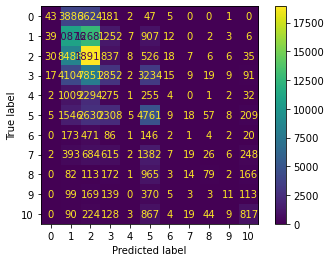

In [136]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

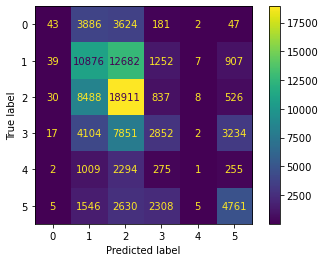

In [137]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.2'></a>
### Cat Boost Classifier

In [138]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)
cb.fit(X_train, y_train)

Learning rate set to 0.104018
0:	learn: 2.2572303	total: 514ms	remaining: 8m 33s
1:	learn: 2.1575711	total: 862ms	remaining: 7m 10s
2:	learn: 2.0816488	total: 1.19s	remaining: 6m 36s
3:	learn: 2.0214556	total: 1.54s	remaining: 6m 24s
4:	learn: 1.9743004	total: 1.88s	remaining: 6m 14s
5:	learn: 1.9349862	total: 2.22s	remaining: 6m 7s
6:	learn: 1.9025138	total: 2.56s	remaining: 6m 3s
7:	learn: 1.8749032	total: 2.92s	remaining: 6m 2s
8:	learn: 1.8511753	total: 3.26s	remaining: 5m 59s
9:	learn: 1.8304131	total: 3.62s	remaining: 5m 58s
10:	learn: 1.8127020	total: 3.99s	remaining: 5m 58s
11:	learn: 1.7968120	total: 4.33s	remaining: 5m 56s
12:	learn: 1.7835675	total: 4.67s	remaining: 5m 54s
13:	learn: 1.7717889	total: 5.01s	remaining: 5m 53s
14:	learn: 1.7616204	total: 5.37s	remaining: 5m 52s
15:	learn: 1.7528468	total: 5.73s	remaining: 5m 52s
16:	learn: 1.7446621	total: 6.07s	remaining: 5m 51s
17:	learn: 1.7377185	total: 6.43s	remaining: 5m 51s
18:	learn: 1.7316458	total: 6.78s	remaining: 5m

158:	learn: 1.6206634	total: 55.3s	remaining: 4m 52s
159:	learn: 1.6203607	total: 55.7s	remaining: 4m 52s
160:	learn: 1.6202084	total: 56.1s	remaining: 4m 52s
161:	learn: 1.6200646	total: 56.4s	remaining: 4m 51s
162:	learn: 1.6199054	total: 56.7s	remaining: 4m 51s
163:	learn: 1.6196654	total: 57s	remaining: 4m 50s
164:	learn: 1.6193874	total: 57.4s	remaining: 4m 50s
165:	learn: 1.6189787	total: 57.7s	remaining: 4m 50s
166:	learn: 1.6186998	total: 58.1s	remaining: 4m 49s
167:	learn: 1.6182227	total: 58.4s	remaining: 4m 49s
168:	learn: 1.6180690	total: 58.8s	remaining: 4m 48s
169:	learn: 1.6178031	total: 59.1s	remaining: 4m 48s
170:	learn: 1.6175737	total: 59.5s	remaining: 4m 48s
171:	learn: 1.6174206	total: 59.8s	remaining: 4m 47s
172:	learn: 1.6172029	total: 1m	remaining: 4m 47s
173:	learn: 1.6169137	total: 1m	remaining: 4m 47s
174:	learn: 1.6167896	total: 1m	remaining: 4m 47s
175:	learn: 1.6165468	total: 1m 1s	remaining: 4m 46s
176:	learn: 1.6163869	total: 1m 1s	remaining: 4m 46s
177:

312:	learn: 1.5880450	total: 1m 49s	remaining: 3m 59s
313:	learn: 1.5878284	total: 1m 49s	remaining: 3m 58s
314:	learn: 1.5876179	total: 1m 49s	remaining: 3m 58s
315:	learn: 1.5874833	total: 1m 50s	remaining: 3m 58s
316:	learn: 1.5873072	total: 1m 50s	remaining: 3m 57s
317:	learn: 1.5870747	total: 1m 50s	remaining: 3m 57s
318:	learn: 1.5869079	total: 1m 51s	remaining: 3m 57s
319:	learn: 1.5867415	total: 1m 51s	remaining: 3m 56s
320:	learn: 1.5866035	total: 1m 51s	remaining: 3m 56s
321:	learn: 1.5864993	total: 1m 52s	remaining: 3m 56s
322:	learn: 1.5863785	total: 1m 52s	remaining: 3m 55s
323:	learn: 1.5862184	total: 1m 52s	remaining: 3m 55s
324:	learn: 1.5861528	total: 1m 53s	remaining: 3m 55s
325:	learn: 1.5859923	total: 1m 53s	remaining: 3m 54s
326:	learn: 1.5857481	total: 1m 53s	remaining: 3m 54s
327:	learn: 1.5855676	total: 1m 54s	remaining: 3m 53s
328:	learn: 1.5853962	total: 1m 54s	remaining: 3m 53s
329:	learn: 1.5852848	total: 1m 54s	remaining: 3m 53s
330:	learn: 1.5850886	total:

465:	learn: 1.5658971	total: 2m 42s	remaining: 3m 5s
466:	learn: 1.5657102	total: 2m 42s	remaining: 3m 5s
467:	learn: 1.5656020	total: 2m 42s	remaining: 3m 5s
468:	learn: 1.5655000	total: 2m 43s	remaining: 3m 4s
469:	learn: 1.5653904	total: 2m 43s	remaining: 3m 4s
470:	learn: 1.5651932	total: 2m 44s	remaining: 3m 4s
471:	learn: 1.5650220	total: 2m 44s	remaining: 3m 3s
472:	learn: 1.5649261	total: 2m 44s	remaining: 3m 3s
473:	learn: 1.5648077	total: 2m 45s	remaining: 3m 3s
474:	learn: 1.5647238	total: 2m 45s	remaining: 3m 2s
475:	learn: 1.5646302	total: 2m 45s	remaining: 3m 2s
476:	learn: 1.5644787	total: 2m 46s	remaining: 3m 2s
477:	learn: 1.5643365	total: 2m 46s	remaining: 3m 1s
478:	learn: 1.5642422	total: 2m 46s	remaining: 3m 1s
479:	learn: 1.5641347	total: 2m 47s	remaining: 3m
480:	learn: 1.5640553	total: 2m 47s	remaining: 3m
481:	learn: 1.5639254	total: 2m 47s	remaining: 3m
482:	learn: 1.5637906	total: 2m 48s	remaining: 2m 59s
483:	learn: 1.5636848	total: 2m 48s	remaining: 2m 59s


618:	learn: 1.5483539	total: 3m 35s	remaining: 2m 12s
619:	learn: 1.5481809	total: 3m 35s	remaining: 2m 12s
620:	learn: 1.5480999	total: 3m 36s	remaining: 2m 11s
621:	learn: 1.5479758	total: 3m 36s	remaining: 2m 11s
622:	learn: 1.5478911	total: 3m 36s	remaining: 2m 11s
623:	learn: 1.5477965	total: 3m 37s	remaining: 2m 10s
624:	learn: 1.5477260	total: 3m 37s	remaining: 2m 10s
625:	learn: 1.5476015	total: 3m 37s	remaining: 2m 10s
626:	learn: 1.5475072	total: 3m 38s	remaining: 2m 9s
627:	learn: 1.5474296	total: 3m 38s	remaining: 2m 9s
628:	learn: 1.5473596	total: 3m 38s	remaining: 2m 9s
629:	learn: 1.5472350	total: 3m 39s	remaining: 2m 8s
630:	learn: 1.5471177	total: 3m 39s	remaining: 2m 8s
631:	learn: 1.5469908	total: 3m 39s	remaining: 2m 8s
632:	learn: 1.5468389	total: 3m 40s	remaining: 2m 7s
633:	learn: 1.5467800	total: 3m 40s	remaining: 2m 7s
634:	learn: 1.5466617	total: 3m 41s	remaining: 2m 7s
635:	learn: 1.5465839	total: 3m 41s	remaining: 2m 6s
636:	learn: 1.5465051	total: 3m 41s	re

772:	learn: 1.5327653	total: 4m 29s	remaining: 1m 19s
773:	learn: 1.5326945	total: 4m 29s	remaining: 1m 18s
774:	learn: 1.5325936	total: 4m 29s	remaining: 1m 18s
775:	learn: 1.5324644	total: 4m 30s	remaining: 1m 18s
776:	learn: 1.5323538	total: 4m 30s	remaining: 1m 17s
777:	learn: 1.5322611	total: 4m 31s	remaining: 1m 17s
778:	learn: 1.5321879	total: 4m 31s	remaining: 1m 16s
779:	learn: 1.5320759	total: 4m 31s	remaining: 1m 16s
780:	learn: 1.5319471	total: 4m 32s	remaining: 1m 16s
781:	learn: 1.5318455	total: 4m 32s	remaining: 1m 15s
782:	learn: 1.5317498	total: 4m 32s	remaining: 1m 15s
783:	learn: 1.5316596	total: 4m 33s	remaining: 1m 15s
784:	learn: 1.5316048	total: 4m 33s	remaining: 1m 14s
785:	learn: 1.5315482	total: 4m 33s	remaining: 1m 14s
786:	learn: 1.5314652	total: 4m 34s	remaining: 1m 14s
787:	learn: 1.5313170	total: 4m 34s	remaining: 1m 13s
788:	learn: 1.5311749	total: 4m 34s	remaining: 1m 13s
789:	learn: 1.5310871	total: 4m 35s	remaining: 1m 13s
790:	learn: 1.5310123	total:

928:	learn: 1.5183597	total: 5m 23s	remaining: 24.7s
929:	learn: 1.5182790	total: 5m 24s	remaining: 24.4s
930:	learn: 1.5182269	total: 5m 24s	remaining: 24s
931:	learn: 1.5181574	total: 5m 24s	remaining: 23.7s
932:	learn: 1.5180569	total: 5m 25s	remaining: 23.4s
933:	learn: 1.5179814	total: 5m 25s	remaining: 23s
934:	learn: 1.5178926	total: 5m 25s	remaining: 22.7s
935:	learn: 1.5177889	total: 5m 26s	remaining: 22.3s
936:	learn: 1.5177383	total: 5m 26s	remaining: 22s
937:	learn: 1.5176379	total: 5m 26s	remaining: 21.6s
938:	learn: 1.5175554	total: 5m 27s	remaining: 21.3s
939:	learn: 1.5174362	total: 5m 27s	remaining: 20.9s
940:	learn: 1.5173548	total: 5m 27s	remaining: 20.6s
941:	learn: 1.5172667	total: 5m 28s	remaining: 20.2s
942:	learn: 1.5171980	total: 5m 28s	remaining: 19.9s
943:	learn: 1.5171220	total: 5m 28s	remaining: 19.5s
944:	learn: 1.5170473	total: 5m 29s	remaining: 19.2s
945:	learn: 1.5169294	total: 5m 29s	remaining: 18.8s
946:	learn: 1.5168702	total: 5m 29s	remaining: 18.5s

In [139]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))

Accuracy : 0.382


In [140]:
y_pred = y_pred.flatten()
y_pred.shape

(105085,)

In [141]:
y_diff = np.abs(y_test.ravel()-y_pred.ravel())

In [142]:
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

Score : 0.8852


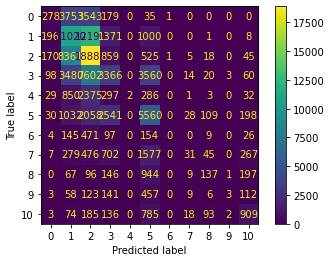

In [143]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

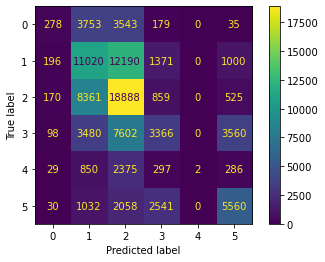

In [144]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.3'></a>
### XGB BOOST Classifier

In [151]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[19:19:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [152]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test.ravel()-y_pred.ravel()))/K
print(f'Score : %.4f' % score)

Accuracy : 0.374
Score : 0.8829


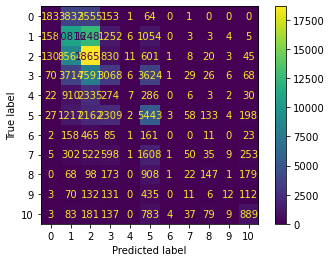

In [153]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()